# 1. Pemahaman Dataset

## Sumber Data dan Variabel yang Digunakan  

### 📌 Sumber Data  
Dataset yang digunakan dalam proyek ini berasal dari Kaggle dengan tautan berikut:  
🔗 [E-Commerce Sales Prediction Dataset](https://www.kaggle.com/datasets/nevildhinoja/e-commerce-sales-prediction-dataset)  

Repositori ini berisi dataset yang komprehensif dan bersih untuk memprediksi penjualan e-commerce. Dataset ini dirancang untuk:  
- Menganalisis tren penjualan 📊  
- Mengoptimalkan strategi penetapan harga 💰  
- Mengembangkan model prediktif untuk peramalan penjualan 🤖  

### 📊 Variabel dalam Dataset  
Dataset ini terdiri dari **1.000 entri** dengan fitur-fitur berikut:  

| 🏷 Column Name       | 📖 Description |
|---------------------|--------------|
| **Date**            | Tanggal transaksi penjualan (mulai dari 01-01-2023). 📅 |
| **Product_Category** | Kategori produk (misalnya: Electronics, Sports, Other). 🎧⚽ |
| **Price**           | Harga produk dalam bentuk numerik. 💲 |
| **Discount**        | Diskon yang diterapkan pada produk (numerik). 🔖 |
| **Customer_Segment**| Segmen pelanggan (misalnya: Regular, Occasional, Other). 👥 |
| **Marketing_Spend** | Anggaran pemasaran yang dialokasikan untuk penjualan (numerik). 📢 |
| **Units_Sold**      | Jumlah unit produk yang terjual per transaksi (numerik). 📦 |

Dengan dataset ini, kita dapat melakukan berbagai analisis dan membangun model prediksi untuk memahami faktor-faktor yang memengaruhi penjualan e-commerce. 🚀  


## 🔍 Statistik Deskriptif dan Visualisasi Awal Data  

Setelah memahami struktur dataset, langkah selanjutnya adalah melakukan eksplorasi awal dengan statistik deskriptif dan visualisasi data.  

### 📊 **Statistik Deskriptif**  
Statistik deskriptif memberikan gambaran umum mengenai distribusi data, termasuk **rata-rata (mean), median, standar deviasi, nilai minimum, dan maksimum** untuk setiap variabel numerik dalam dataset.  

### 📈 **Visualisasi Awal Data**  
Beberapa visualisasi yang digunakan dalam eksplorasi awal dataset ini meliputi:  
- **Distribusi Price** menggunakan histogram.
- **Distribusi Discount** menggunakan histogram.
- **Distribusi Marketing_Spend** menggunakan histogram.
- **Distribusi Units_Sold** menggunakan histogram.
- **Visualisasi Product_Category** menggunakan barchart dan pie chart
- **Visualisasi Customer_Segment** menggunakan barchart dan pie chart  

Kode berikut digunakan untuk menghasilkan statistik deskriptif dan visualisasi awal:  

In [ ]:
import pandas as pd

# membaca dataset
df = pd.read_csv("Ecommerce_Sales_Prediction_Dataset.csv")


In [ ]:
# menampilkan dataset
df

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
0,01-01-2023,Sports,932.80,35.82,Occasional,6780.38,32
1,02-01-2023,Toys,569.48,3.60,Premium,6807.56,16
2,03-01-2023,Home Decor,699.68,3.56,Premium,3793.91,27
3,04-01-2023,Toys,923.27,0.61,Premium,9422.75,29
4,05-01-2023,Toys,710.17,47.83,Premium,1756.83,17
...,...,...,...,...,...,...,...
995,22-09-2025,Fashion,740.06,49.06,Regular,1890.83,34
996,23-09-2025,Electronics,517.10,28.48,Premium,8011.66,21
997,24-09-2025,Electronics,683.43,12.98,Occasional,3408.51,19
998,25-09-2025,Sports,51.26,21.85,Occasional,7335.62,26


In [ ]:
# menampilkan ringkasan informasi tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1000 non-null   object 
 1   Product_Category  1000 non-null   object 
 2   Price             1000 non-null   float64
 3   Discount          1000 non-null   float64
 4   Customer_Segment  1000 non-null   object 
 5   Marketing_Spend   1000 non-null   float64
 6   Units_Sold        1000 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 54.8+ KB


Berdasarkan hasil df.info() terdapat 3 buah dataset bertype kategori yaitu Date, Product_Category, dan Customer_segment. Sedangkan data bertype numerik yaitu Price, Discount, Marketing_Spend, dan Units_Sold. Masing-masing kolom memiliki 1000 baris.

In [ ]:
# menampilkan ukuran table dari dataset
df.shape

(1000, 7)

In [ ]:
# menampilkan informasi statistik dari kolom kolom numerik pada dataset
df.describe()

,Price,Discount,Marketing_Spend,Units_Sold
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,505.241920,24.919750,4912.830240,29.631000
std,289.791248,14.439951,2840.602656,7.267989
min,14.590000,0.010000,100.300000,5.000000
25%,243.342500,12.995000,2413.020000,24.000000
50%,509.310000,24.965000,4837.245000,30.000000
75%,747.592500,37.562500,7319.675000,34.000000
max,999.420000,49.920000,9995.620000,57.000000


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🎨 Visualisasi Data
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0, 0.5, 'Frekuensi')

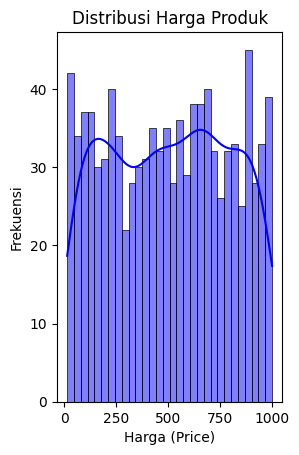

In [12]:
# Histogram Harga Produk
plt.subplot(1, 2, 1)
sns.histplot(df["Price"], bins=30, kde=True, color="blue")
plt.title("Distribusi Harga Produk")
plt.xlabel("Harga (Price)")
plt.ylabel("Frekuensi")

Text(0, 0.5, 'Frekuensi')

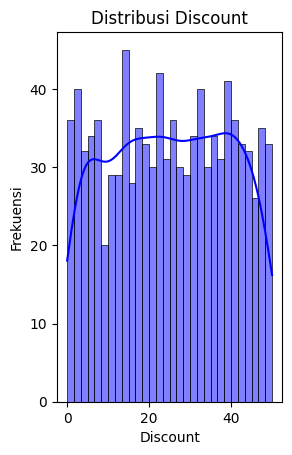

In [13]:
# Histogram discount
plt.subplot(1, 2, 1)
sns.histplot(df["Discount"], bins=30, kde=True, color="blue")
plt.title("Distribusi Discount")
plt.xlabel("Discount")
plt.ylabel("Frekuensi")

Text(0, 0.5, 'Frekuensi')

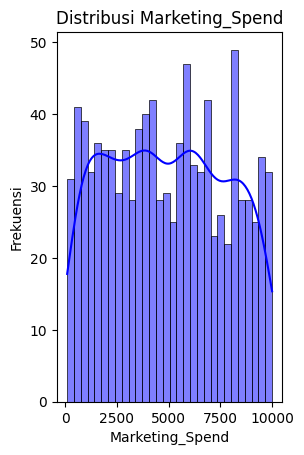

In [17]:
# Histogram Marketing_Spend
plt.subplot(1, 2, 1)
sns.histplot(df["Marketing_Spend"], bins=30, kde=True, color="blue")
plt.title("Distribusi Marketing_Spend")
plt.xlabel("Marketing_Spend")
plt.ylabel("Frekuensi")

Text(0, 0.5, 'Frekuensi')

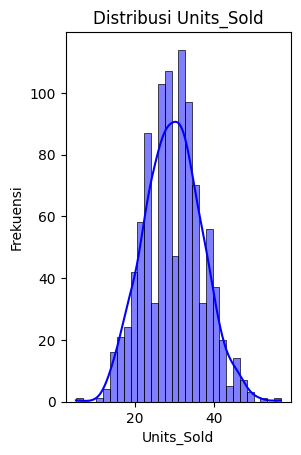

In [15]:
# Histogram Units_Sold
plt.subplot(1, 2, 1)
sns.histplot(df["Units_Sold"], bins=30, kde=True, color="blue")
plt.title("Distribusi Units_Sold")
plt.xlabel("Units_Sold")
plt.ylabel("Frekuensi")

In [18]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [26]:
# Mencari nilai unik dari kolom kategorik
product_categories = df["Product_Category"].unique()
customer_segments = df["Customer_Segment"].unique()

# Menampilkan hasil
print("Kategori Produk Unik:", product_categories)
print("Segmen Pelanggan Unik:", customer_segments)

# Menghitung jumlah nilai unik
num_product_categories = df["Product_Category"].nunique()
num_customer_segments = df["Customer_Segment"].nunique()

print(f"\nJumlah Kategori Produk Unik: {num_product_categories}")
print(f"Jumlah Segmen Pelanggan Unik: {num_customer_segments}")

Kategori Produk Unik: ['Sports' 'Toys' 'Home Decor' 'Fashion' 'Electronics']
Segmen Pelanggan Unik: ['Occasional' 'Premium' 'Regular']

Jumlah Kategori Produk Unik: 5
Jumlah Segmen Pelanggan Unik: 3


C:\Users\ACER\AppData\Local\Temp\ipykernel_9576\4173622797.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Product_Category", palette="viridis", order=df["Product_Category"].value_counts().index)


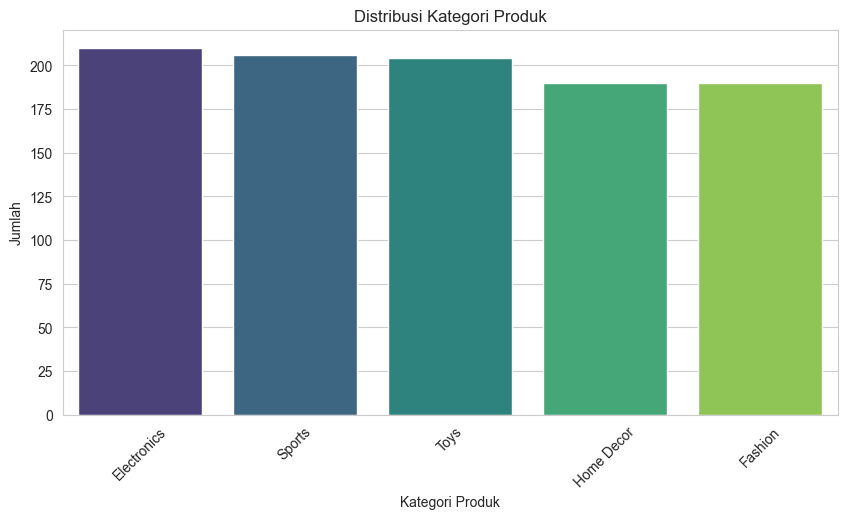

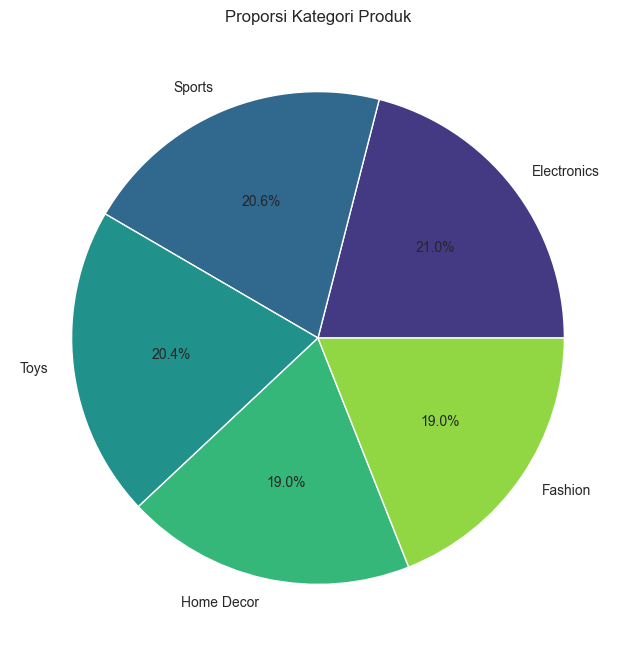

In [23]:
# 🎨 Set style seaborn
sns.set_style("whitegrid")

# 📌 Countplot untuk Product_Category
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Product_Category", palette="viridis", order=df["Product_Category"].value_counts().index)
plt.title("Distribusi Kategori Produk")
plt.xlabel("Kategori Produk")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.show()

# 📌 Pie Chart untuk Product_Category
plt.figure(figsize=(8, 8))
df["Product_Category"].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("viridis", len(df["Product_Category"].unique())))
plt.title("Proporsi Kategori Produk")
plt.ylabel("")
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_9576\1925487948.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Customer_Segment", palette="coolwarm", order=df["Customer_Segment"].value_counts().index)


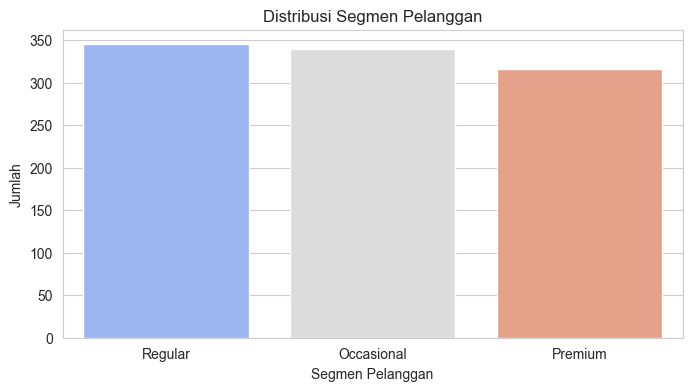

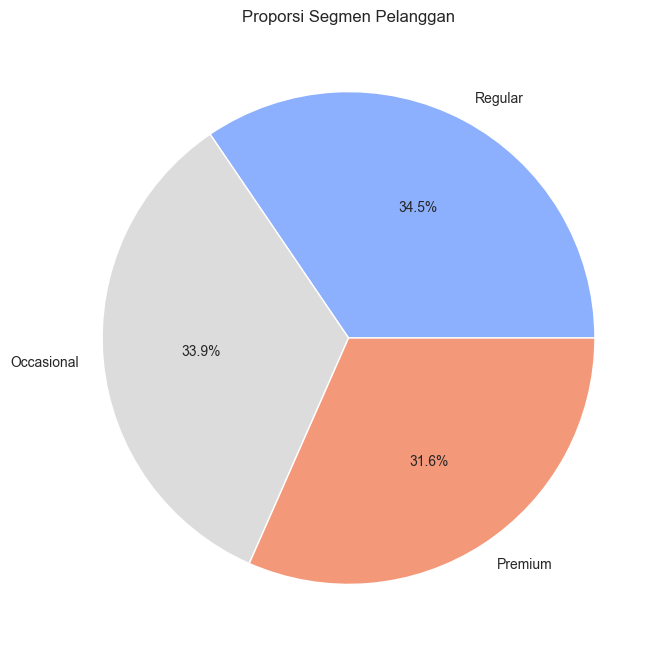

In [24]:
# 📌 Countplot untuk Customer_Segment
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Customer_Segment", palette="coolwarm", order=df["Customer_Segment"].value_counts().index)
plt.title("Distribusi Segmen Pelanggan")
plt.xlabel("Segmen Pelanggan")
plt.ylabel("Jumlah")
plt.show()

# 📌 Pie Chart untuk Customer_Segment
plt.figure(figsize=(8, 8))
df["Customer_Segment"].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("coolwarm", len(df["Customer_Segment"].unique())))
plt.title("Proporsi Segmen Pelanggan")
plt.ylabel("")
plt.show()

2. Eksplorasi Data dan Pra-pemrosesan
- Menangani missing values (jika ada).
- Normalisasi atau standarisasi data jika diperlukan.
- Analisis korelasi antara variabel independen dan dependen.

3. Implementasi Model
- Membangun model Linear Regression dan Polynomial Regression.
- Memilih derajat polinomial yang sesuai dengan dataset.
- Menggunakan teknik validasi seperti train-test split atau cross-validation.

4. Evaluasi Model
- Menggunakan metrik evaluasi seperti Mean Squared Error (MSE), R² Score, dan 
Mean Absolute Error (MAE).
- Membandingkan kinerja regresi linear dan polinomial.

5. Analisis Hasil
- Menginterpretasikan koefisien regresi.
- Menyajikan grafik regression line dan polynomial fit.
- Menyimpulkan apakah model yang dibuat cukup baik dalam memprediksi target.

6. Laporan dan Presentasi
- Laporan dalam format PDF berisi seluruh hasil analisis dan implementasi.
- Slide presentasi per kelompok untuk menjelaskan hasil analisis.